In [5]:
from PIL import Image
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline  
import cv2 as cv

In [9]:
# Load images
foreground_image_path = cv.imread('drone_3.jpg',0)
background_image_path = 'background.jpg'

# Set mask threshold
pix_thresh = 245

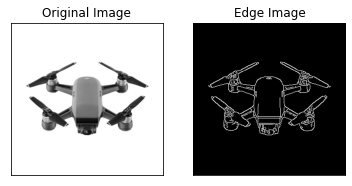

In [10]:
edges = cv.Canny(foreground_image_path,100,200)
plt.subplot(121),plt.imshow(foreground_image_path,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
# Load images and set max values
foreground_image = Image.open(foreground_image_path)
background_image = Image.open(background_image_path)
background_max_x = background_image.size[0]
background_max_y = background_image.size[1]
foreground_max_x = foreground_image.size[0]
foreground_max_y = foreground_image.size[1]

In [4]:
foreground_image.show()

In [5]:
background_image.show()

In [6]:
# Create mask image
mask = Image.new('1', (foreground_max_x, foreground_max_y))

In [7]:
# Iterate over pixels and create mask
for x in range(foreground_max_x):
        for y in range(foreground_max_y):
            if (sum(foreground_image.getpixel((x,y))) / 3) > pix_thresh:
                mask.putpixel((x,y), 0)
            else:
                mask.putpixel((x,y), 1)

In [8]:
# Resize foreground image and mask if needed
new_x = 50
new_y = 50
foreground_image = foreground_image.resize((new_x, new_y))
mask = mask.resize((new_x, new_y))

In [9]:
mask.show()

In [11]:
# Augmentation pipe for foreground image

In [12]:
# Get random copy/paste coordinates
copy_paste_x = randint(0, background_max_x - new_x)
copy_paste_y = randint(0, background_max_y - new_y)

In [13]:
print(f'x:{copy_paste_x}, y:{copy_paste_y}')

x:278, y:551


In [16]:
# mask.show()

In [18]:
# Create new copy/paste image
copy_paste_image = background_image.paste(foreground_image, (copy_paste_x, copy_paste_y), mask)

In [19]:
background_image.show()